# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

import tensorflow as tf

# Load Dataset

In [2]:
df_train = pd.read_csv(r"C:\Users\Test User\Desktop\Projects\Datasets\Carona Dataset\Training_Data_Features.csv")
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df_train.shape

(1456, 24)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [5]:
df_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [6]:
df_data_label = pd.read_csv(r"C:\Users\Test User\Desktop\Projects\Datasets\Carona Dataset\Training_Data_Labels.csv")
df_data_label.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [7]:
df_data_label.shape

(1456, 4)

In [8]:
df_train["total_cases"] = df_data_label["total_cases"]

In [9]:
df_train.shape

(1456, 25)

In [10]:
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Load Test Dataset

In [11]:
df_test = pd.read_csv(r"C:\Users\Test User\Desktop\Projects\Datasets\Carona Dataset\Test_Data_Features.csv")
df_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,4/29/2008,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,5/6/2008,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,5/13/2008,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,5/20/2008,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,5/27/2008,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [12]:
df_test.shape

(416, 24)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

In [14]:
df_test.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


# EDA (Exploratory Data Analysis)

## Remove Duplicate Values

### Train Data

In [15]:
duplicate_train = df_train.duplicated()
print(duplicate_train.sum())

0


### Test Data

In [16]:
duplicate_test = df_test.duplicated()
print(duplicate_test.sum())

0


## Remove Null Values

### Train Data

In [17]:
df_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [18]:
df_train["station_precip_mm"].value_counts()

station_precip_mm
0.0      42
0.5      19
0.8      11
3.3      11
1.3      10
         ..
15.7      1
106.2     1
80.3      1
87.8      1
35.4      1
Name: count, Length: 663, dtype: int64

In [19]:
df_train["station_precip_mm"].mean()

39.32635983263598

In [20]:
# Fill Null Value of these columns
df_train["ndvi_ne"] = df_train["ndvi_ne"].fillna(df_train["ndvi_ne"].mean())
df_train["ndvi_nw"] = df_train["ndvi_nw"].fillna(df_train["ndvi_nw"].mean())
df_train["ndvi_se"] = df_train["ndvi_se"].fillna(df_train["ndvi_se"].mean())
df_train["ndvi_sw"] = df_train["ndvi_sw"].fillna(df_train["ndvi_sw"].mean())
df_train["station_avg_temp_c"] = df_train["station_avg_temp_c"].fillna(df_train["station_avg_temp_c"].mean())
df_train["station_diur_temp_rng_c"] = df_train["station_diur_temp_rng_c"].fillna(df_train["station_diur_temp_rng_c"].mean())
df_train["station_max_temp_c"] = df_train["station_max_temp_c"].fillna(df_train["station_max_temp_c"].mean())
df_train["station_precip_mm"] = df_train["station_precip_mm"].fillna(df_train['station_precip_mm'].mean())

In [21]:
# df_train.fillna(df_train.mean(),inplace=True)

In [22]:
df_train.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                     13
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_max_air_temp_k                10
reanalysis_min_air_temp_k                10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg    10
reanalysis_tdtr_k                        10
station_avg_temp_c                        0
station_diur_temp_rng_c                   0
station_max_temp_c                        0
station_min_temp_c              

In [23]:
# Remove Null Values
df_train.dropna(inplace=True)

In [24]:
df_train.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

### Test Data

In [25]:
df_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [26]:
df_test.shape

(416, 24)

In [27]:
df_test["station_diur_temp_rng_c"].value_counts()

station_diur_temp_rng_c
5.785714     8
5.700000     8
6.028571     7
6.585714     6
6.500000     5
            ..
10.760000    1
9.625000     1
10.350000    1
11.850000    1
9.675000     1
Name: count, Length: 239, dtype: int64

In [28]:
df_test["station_avg_temp_c"].mean()

27.36958686935644

In [29]:
# Fill Null Values in these column
df_test["ndvi_ne"] = df_test["ndvi_ne"].fillna(df_test["ndvi_ne"].mean())
df_test["ndvi_nw"] = df_test["ndvi_nw"].fillna(df_test["ndvi_nw"].mean())
df_test["station_avg_temp_c"] = df_test['station_avg_temp_c'].fillna(df_test["station_avg_temp_c"].mean())
df_test["station_diur_temp_rng_c"] = df_test["station_diur_temp_rng_c"].fillna(df_test["station_diur_temp_rng_c"].mean())

In [30]:
df_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  1
ndvi_sw                                  1
precipitation_amt_mm                     2
reanalysis_air_temp_k                    2
reanalysis_avg_temp_k                    2
reanalysis_dew_point_temp_k              2
reanalysis_max_air_temp_k                2
reanalysis_min_air_temp_k                2
reanalysis_precip_amt_kg_per_m2          2
reanalysis_relative_humidity_percent     2
reanalysis_sat_precip_amt_mm             2
reanalysis_specific_humidity_g_per_kg    2
reanalysis_tdtr_k                        2
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       3
station_min_temp_c                       9
station_pre

In [31]:
# Remove Null Values
df_test.dropna(inplace=True)

In [32]:
df_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

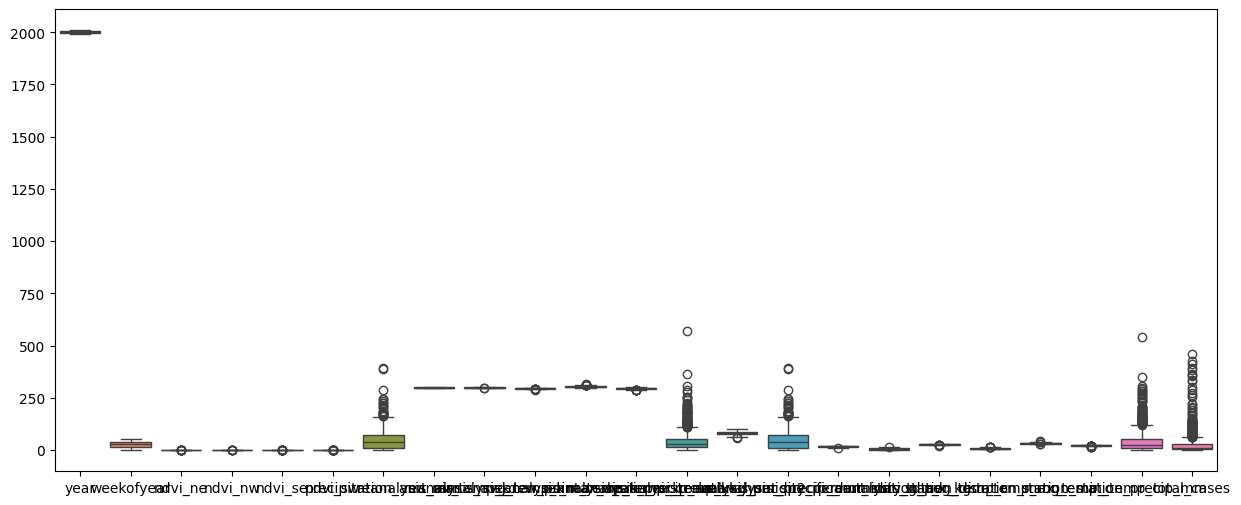

In [33]:
num_cols = df_train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

In [34]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [35]:
for i in num_cols.columns:
    lower_range,upper_range = remove_outlier(df_train[i])
    df_train[i] = np.where(df_train[i] > upper_range, upper_range, df_train[i])
    df_train[i] = np.where(df_train[i] < lower_range, lower_range, df_train[i])

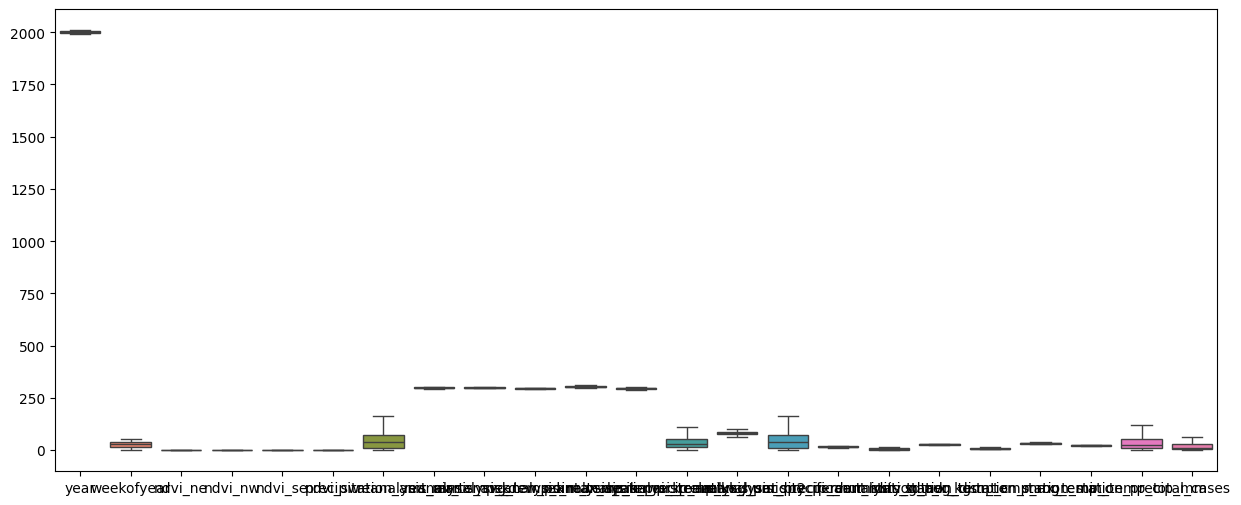

In [36]:
num_cols = df_train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,6))
#num_cols.boxplot()
sns.boxplot(data=num_cols)
plt.show()

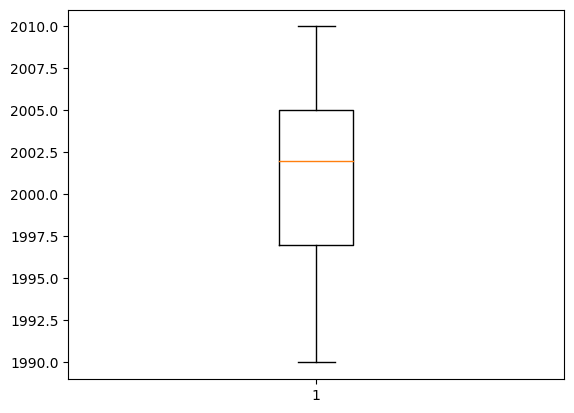

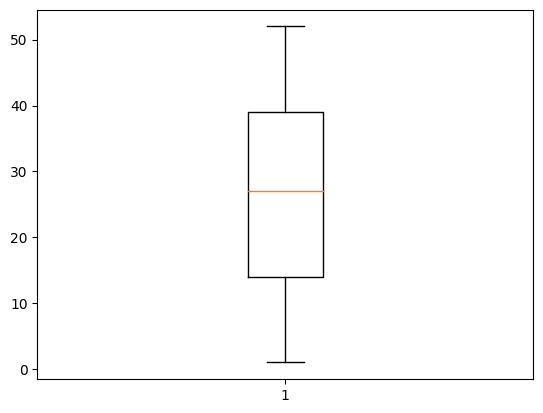

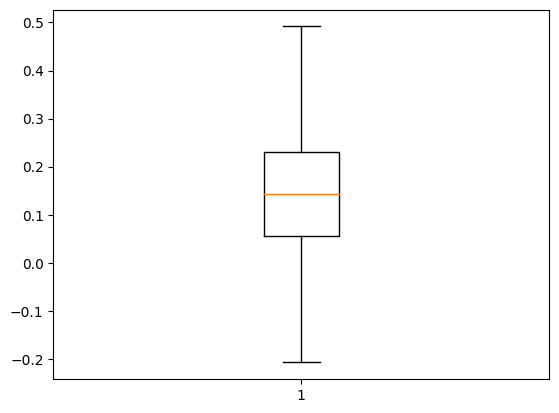

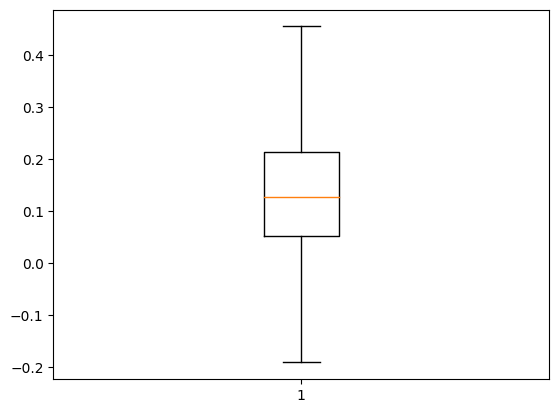

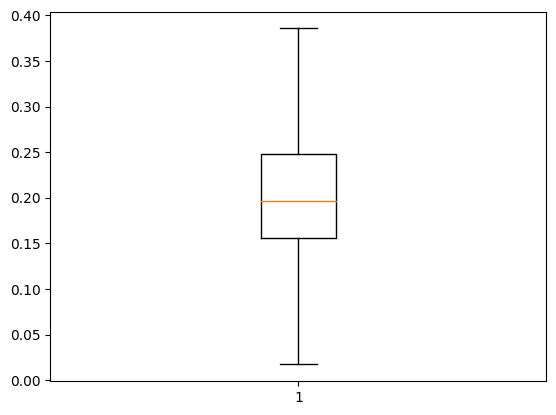

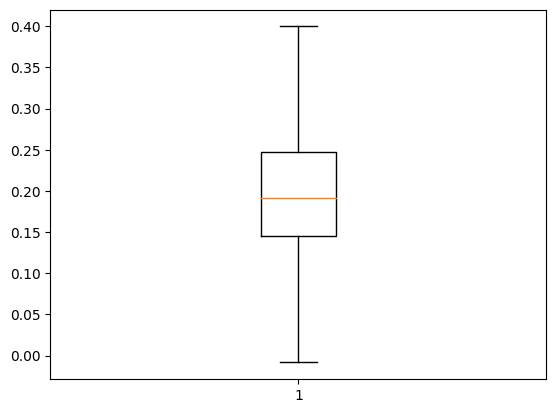

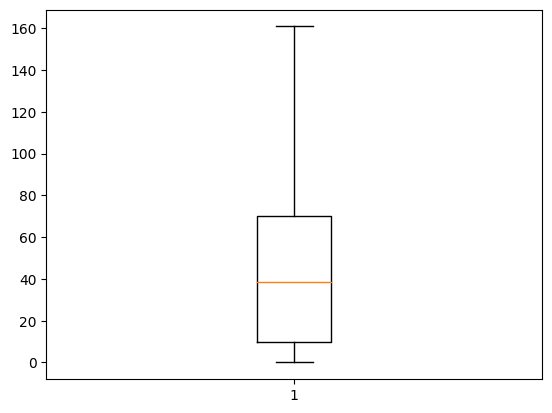

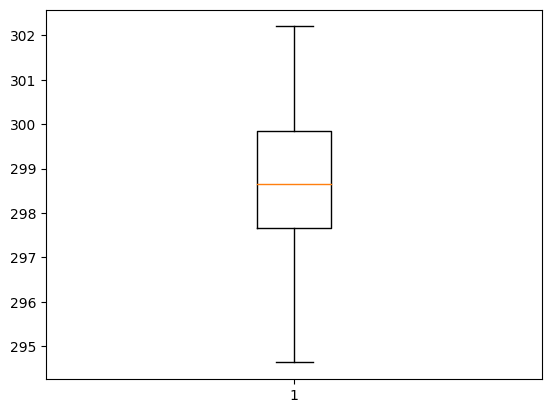

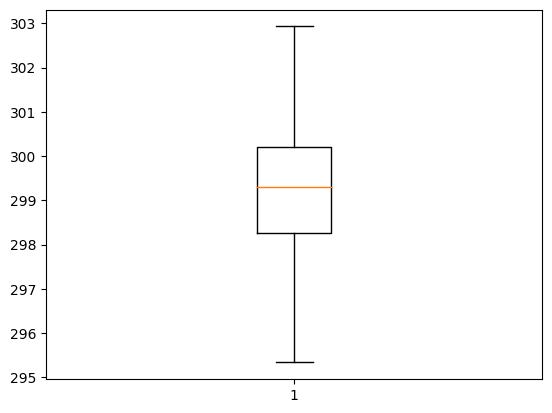

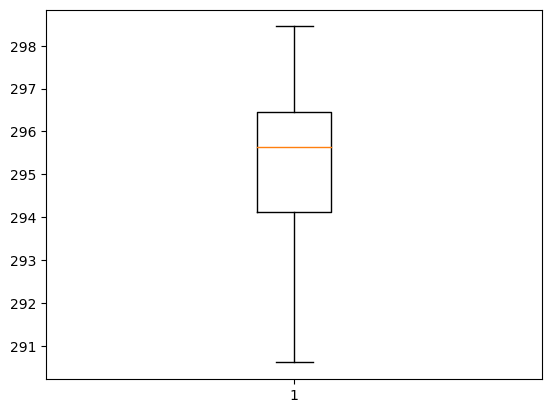

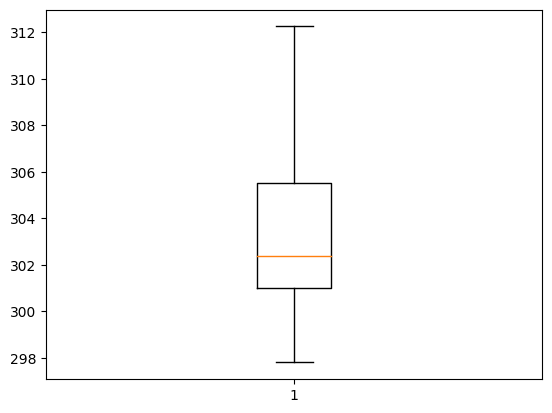

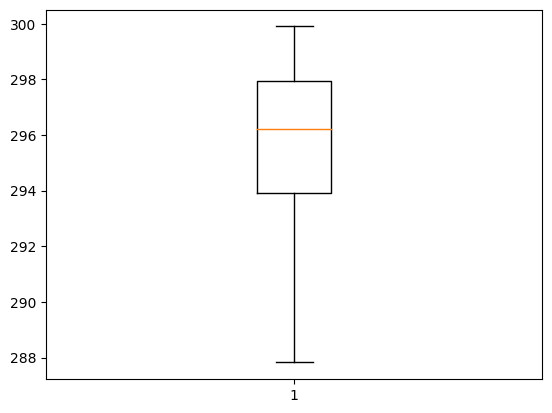

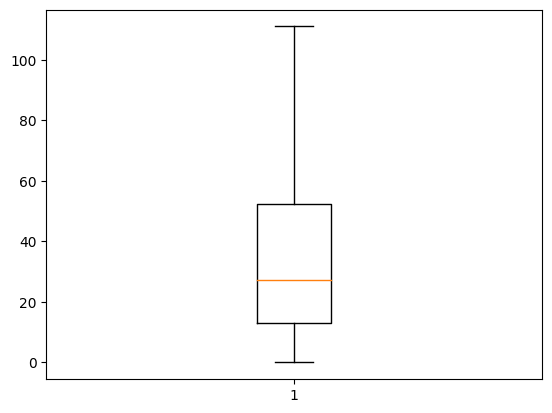

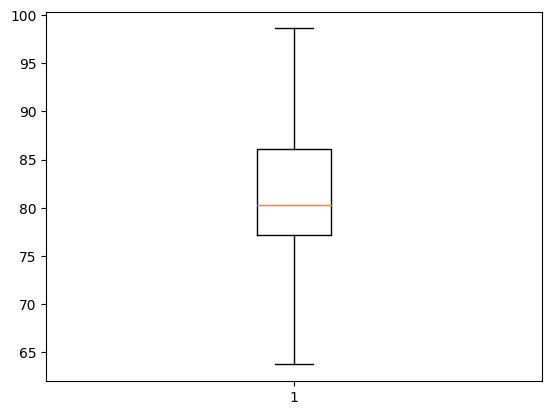

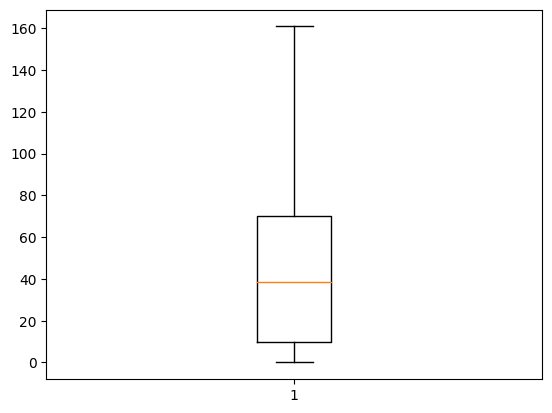

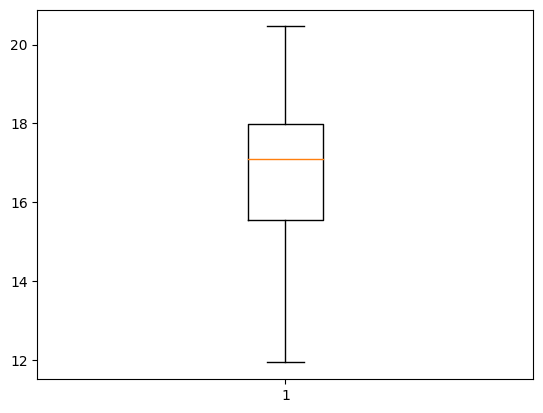

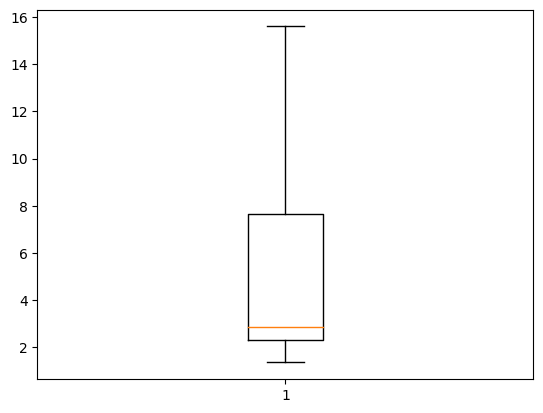

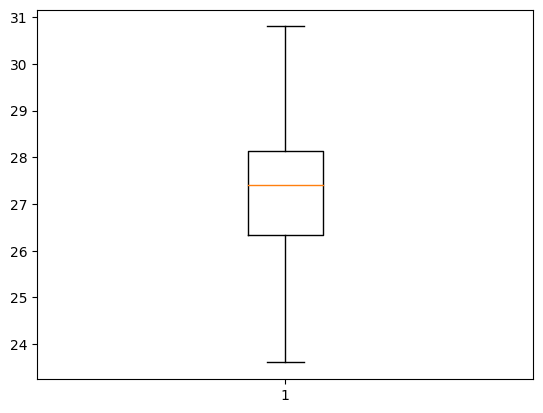

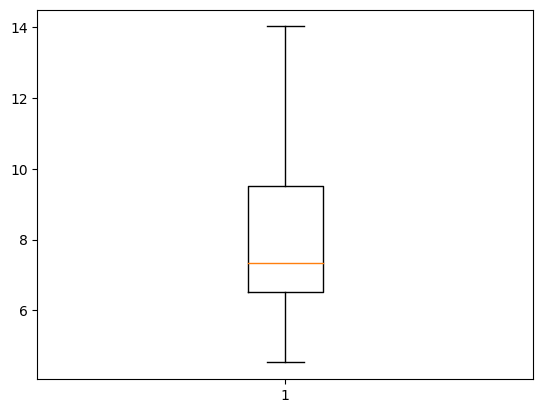

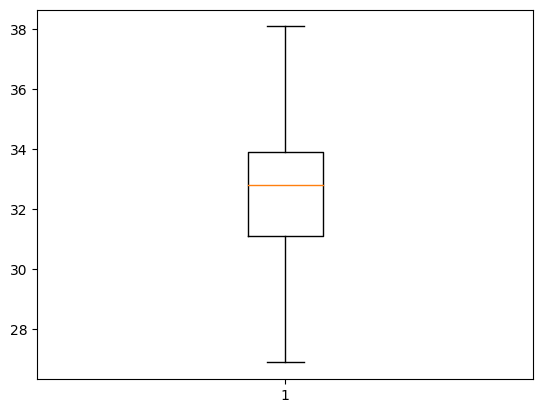

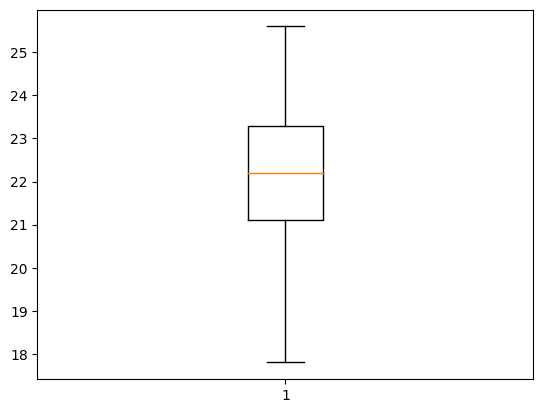

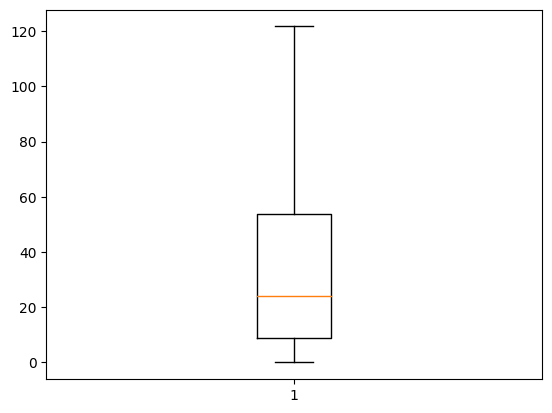

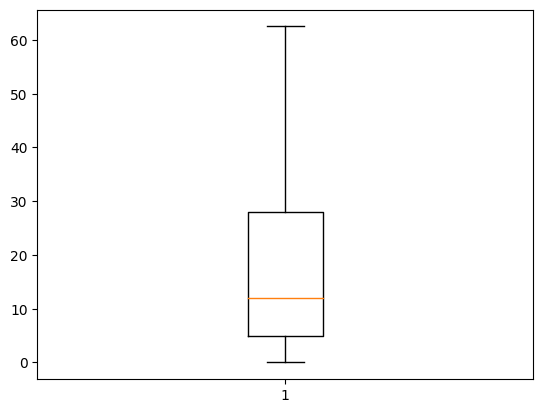

In [37]:
for i in num_cols:
    plt.boxplot(df_train[i])
    plt.show()

## Convert Categorical Data To Numerical

### Train Data

In [38]:
df_train.select_dtypes(include=["object"])

,city,week_start_date
0,sj,1990-04-30
1,sj,1990-05-07
2,sj,1990-05-14
3,sj,1990-05-21
4,sj,1990-05-28
...,...,...
1451,iq,2010-05-28
1452,iq,2010-06-04
1453,iq,2010-06-11
1454,iq,2010-06-18


In [39]:
df_train["week_start_date"] = pd.to_datetime(df_train["week_start_date"], infer_datetime_format=True)

C:\Users\Test User\AppData\Local\Temp\ipykernel_3660\2036613978.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_train["week_start_date"] = pd.to_datetime(df_train["week_start_date"], infer_datetime_format=True)


In [40]:
# le = LabelEncoder()

# df_train["city"] = le.fit_transform(df_train["city"])

In [41]:
df_train.drop(["city",'year','weekofyear'],axis=1,inplace=True)

In [42]:
df_train.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


### Test Data

In [43]:
df_test.select_dtypes(include=["object"])

,city,week_start_date
0,sj,4/29/2008
1,sj,5/6/2008
2,sj,5/13/2008
3,sj,5/20/2008
4,sj,5/27/2008
...,...,...
411,iq,5/28/2013
412,iq,6/4/2013
413,iq,6/11/2013
414,iq,6/18/2013


In [44]:
df_test["week_start_date"] = pd.to_datetime(df_test["week_start_date"], infer_datetime_format=True)

C:\Users\Test User\AppData\Local\Temp\ipykernel_3660\1517157742.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_test["week_start_date"] = pd.to_datetime(df_test["week_start_date"], infer_datetime_format=True)


In [45]:
# df_test["city"] = le.fit_transform(df_test["city"])

In [46]:
df_test.drop(["city",'year','weekofyear'],axis=1,inplace=True)

In [47]:
df_test.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,2008-05-13,-0.00150,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,2008-05-20,0.12605,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


# Normalizing Data

In [48]:
date = df_train["week_start_date"]

In [49]:
date

0      1990-04-30
1      1990-05-07
2      1990-05-14
3      1990-05-21
4      1990-05-28
          ...    
1451   2010-05-28
1452   2010-06-04
1453   2010-06-11
1454   2010-06-18
1455   2010-06-25
Name: week_start_date, Length: 1439, dtype: datetime64[ns]

In [50]:
train_label = df_train.pop('total_cases')
train_label

0       4.0
1       5.0
2       4.0
3       3.0
4       6.0
       ... 
1451    5.0
1452    8.0
1453    1.0
1454    1.0
1455    4.0
Name: total_cases, Length: 1439, dtype: float64

In [51]:
df_train.shape

(1439, 21)

In [52]:
df_train_1 = df_train.iloc[:,1:]
df_train_1

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,110.97,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


### Train Data

In [53]:
# Train Data Normalize
sc = StandardScaler()
train_data_sc = sc.fit_transform(df_train_1)

In [54]:
#train_data_sc = pd.DataFrame(train_data_sc,index=date)

In [55]:
train_data_sc

array([[-0.15539155, -0.23063705, -0.06414324, ..., -1.57118372,
        -1.36045376, -0.57783464],
       [ 0.21111163,  0.09896815, -0.56920176, ..., -0.38629442,
         0.05732375, -0.79157264],
       [-0.85546686,  0.36292404, -0.64130005, ..., -0.12870979,
         0.44399034,  0.15580658],
       ...,
       [ 0.808962  ,  0.1322467 ,  0.66107294, ..., -0.12870979,
        -1.87600921, -0.82623285],
       [ 1.48197342,  0.98702826,  1.05991402, ..., -0.64387905,
        -0.71600944, -0.57783464],
       [ 1.20513102,  0.87730274,  0.99460601, ...,  0.64404409,
         0.05732375, -0.45074719]])

### Test Data

In [56]:
test_date = df_test.pop("week_start_date")

In [57]:
test_date

0     2008-04-29
1     2008-05-06
2     2008-05-13
3     2008-05-20
4     2008-05-27
         ...    
411   2013-05-28
412   2013-06-04
413   2013-06-11
414   2013-06-18
415   2013-06-25
Name: week_start_date, Length: 403, dtype: datetime64[ns]

In [58]:
test_data_sc = sc.fit_transform(df_test)

In [59]:
#test_data_sc = pd.DataFrame(test_data_sc, index=test_date)
#test_data_sc

In [60]:
test_data_sc

array([[-0.90891649, -1.0190889 , -1.31806425, ...,  0.40279932,
        -0.4052086 ,  1.16601061],
       [-0.90309092, -0.9725725 , -1.57944169, ..., -1.30974165,
        -0.11370723, -0.00741099],
       [-0.79628878,  0.02361579, -0.70707196, ...,  0.14332342,
         0.23609441, -0.90540846],
       ...,
       [ 0.75867652,  0.91261976,  0.5754752 , ...,  0.03953305,
        -0.46350888,  1.68243088],
       [ 1.22278035,  1.28239936,  2.5217242 , ..., -0.16804767,
        -0.34690833, -0.013149  ],
       [ 1.41073981,  0.83420599,  1.89409457, ...,  0.03953305,
        -0.23030778, -0.56399728]])

# PCA

In [61]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)

In [62]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [3.91272263e-01 2.63644053e-01 1.26611596e-01 5.52572723e-02
 3.56257564e-02 3.16405892e-02 2.41771298e-02 2.35593322e-02
 1.38418422e-02 9.11340766e-03 8.13373167e-03 5.80750657e-03
 4.03338616e-03 3.89309221e-03 1.93487971e-03 9.68193232e-04
 3.62905893e-04 9.73784972e-05 2.56847493e-05 3.14081561e-35]


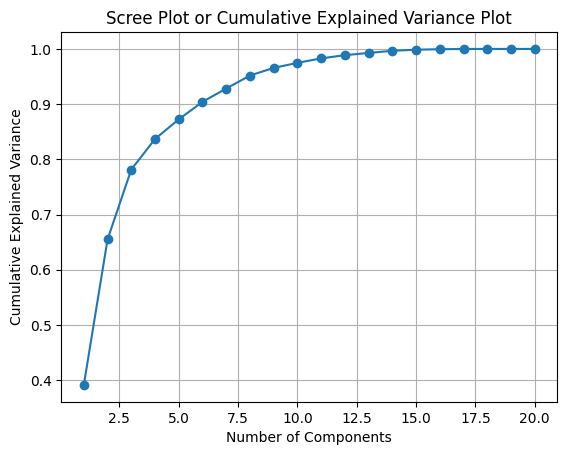

In [63]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [64]:
# Cumulative explained variance nikalen
cumulative_variance = np.cumsum(explained_variance)

# Kitne components select karna hai, yeh decide karen
desired_variance = 0.95  # Example: 95% variance ko capture karna hai

# Kitne components select kiye ja sakte hain
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"\nNumber of components selected: {num_components}")


Number of components selected: 8


In [65]:
pc = PCA(n_components=8)
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.fit_transform(test_data_sc)    

In [66]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.39127226 0.26364405 0.1266116  0.05525727 0.03562576 0.03164059
 0.02417713 0.02355933]


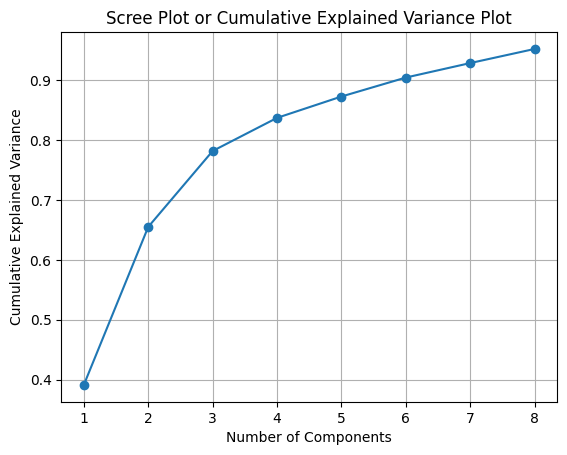

In [67]:
# calculate cumulative sum of explained variance ratio
cumulative_variance = np.cumsum(explained_variance)


# plot the scree plot or cumulative explained variance plot
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# Building Model

## Simple LSTM Model 

In [68]:
#tf.keras.layers.LSTM(128,return_sequences=True),
#tf.keras.layers.LSTM(64,return_sequences=True),
model_lstm_1 = tf.keras.models.Sequential([tf.keras.layers.Reshape((-1,1),input_shape=(train_data_sc_pc.shape[1],)),
                                         tf.keras.layers.Dense(32),
                                         tf.keras.layers.Dense(1)])

In [69]:
model_lstm_1.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=["mae"])

In [70]:
x_train = train_data_sc_pc[:1000]
val_train = train_data_sc_pc[1000:]

y_train = train_label[:1000]
val_label = train_label[1000:]

In [71]:
model_lstm_1.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(val_train,val_label))

Epoch 1/20
1/8 [==>...........................] - ETA: 12s - loss: 928.5023 - mae: 23.5068

8/8 [==============================] - 2s 91ms/step - loss: 962.6404 - mae: 23.5638 - val_loss: 163.8071 - val_mae: 8.4237
Epoch 2/20
8/8 [==============================] - 0s 23ms/step - loss: 957.7346 - mae: 23.4654 - val_loss: 163.3176 - val_mae: 8.3987
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 953.0791 - mae: 23.3707 - val_loss: 162.8926 - val_mae: 8.3798
Epoch 4/20
8/8 [==============================] - 0s 16ms/step - loss: 948.5114 - mae: 23.2784 - val_loss: 162.5102 - val_mae: 8.3646
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 943.8384 - mae: 23.1894 - val_loss: 162.1520 - val_mae: 8.3479
Epoch 6/20
8/8 [==============================] - 0s 10ms/step - loss: 939.3513 - mae: 23.1030 - val_loss: 161.8095 - val_mae: 8.3335
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 934.8098 - mae: 23.0189 - val_loss: 161.4668 - val_mae: 8.3199
Epoch 8/20
8/8 [==============================] - 0s 10ms/step - loss: 930

In [72]:
y_pred = model_lstm_1.predict(train_data_sc_pc)

45/45 [==============================] - 0s 3ms/step


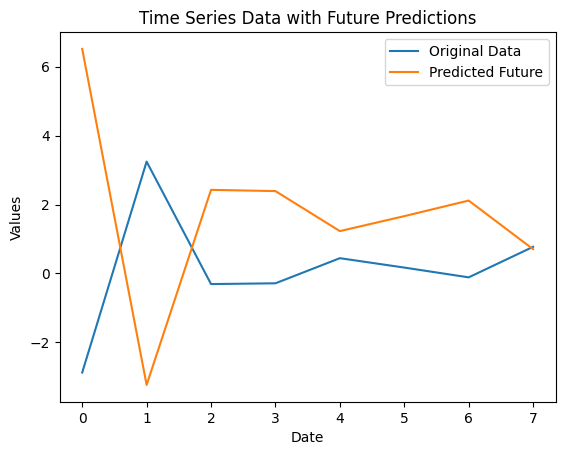

In [73]:
# Plot original time series data
plt.plot(np.arange(len(train_data_sc_pc[0])), train_data_sc_pc[0], label='Original Data')

# Plot predicted future values
plt.plot(np.arange(len(y_pred[0])), y_pred[0], label='Predicted Future')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Data with Future Predictions')
plt.legend()
plt.show()

## Complex LSTM Model

In [74]:
from tensorflow.keras.regularizers import l1, l2

In [75]:
model_lstm =tf.keras.models.Sequential([tf.keras.layers.Reshape((-1,1), input_shape=(train_data_sc_pc.shape[1],)),
                                        tf.keras.layers.LSTM(64,activation="relu",return_sequences=True,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                        tf.keras.layers.Dropout(0.5),
                                        tf.keras.layers.LSTM(32,activation="relu",  kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                        tf.keras.layers.Dropout(0.5),
                                        tf.keras.layers.Dense(1,kernel_regularizer=l1(0.01))])

In [76]:
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=["mae"])

In [77]:
train_data_sc_pc.shape

(1439, 8)

In [78]:
x_train = train_data_sc_pc[:1000]
val_train = train_data_sc_pc[1000:]

y_train = train_label[:1000]
val_label = train_label[1000:]

In [79]:
model_lstm.fit(x_train,y_train,epochs=40,batch_size=128,validation_data=(val_train,val_label))

Epoch 1/40


8/8 [==============================] - 7s 294ms/step - loss: 963.8441 - mae: 23.4116 - val_loss: 172.6543 - val_mae: 8.4860
Epoch 2/40
8/8 [==============================] - 0s 53ms/step - loss: 957.7267 - mae: 23.3115 - val_loss: 168.5163 - val_mae: 8.2946
Epoch 3/40
8/8 [==============================] - 0s 55ms/step - loss: 946.7256 - mae: 23.1127 - val_loss: 158.9796 - val_mae: 7.7818
Epoch 4/40
8/8 [==============================] - 0s 53ms/step - loss: 912.4973 - mae: 22.5948 - val_loss: 133.6048 - val_mae: 7.1200
Epoch 5/40
8/8 [==============================] - 1s 64ms/step - loss: 785.7532 - mae: 20.7068 - val_loss: 204.7450 - val_mae: 11.0993
Epoch 6/40
8/8 [==============================] - 1s 68ms/step - loss: 630.9941 - mae: 18.4208 - val_loss: 121.3485 - val_mae: 7.8736
Epoch 7/40
8/8 [==============================] - 1s 79ms/step - loss: 524.3947 - mae: 16.9487 - val_loss: 118.7086 - val_mae: 7.5049
Epoch 8/40
8/8 [==============================] - 1s 71ms/step - loss: 

## LSTM Using Generator

In [80]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((val_train, val_label))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [81]:
steps_per_epochs = len(x_train) // 128
steps_per_epochs

7

In [82]:
validation_steps = len(val_train) // 128

In [83]:
# model_lstm.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(val_train,val_label))
model_lstm.fit(train_univariate,epochs=20,steps_per_epoch=steps_per_epochs,validation_data=val_univariate,
               validation_steps=validation_steps)

Epoch 1/20


7/7 [==============================] - 6s 285ms/step - loss: 408.0080 - mae: 15.8031 - val_loss: 153.6095 - val_mae: 7.9833
Epoch 2/20
7/7 [==============================] - 0s 38ms/step - loss: 399.7596 - mae: 15.0093 - val_loss: 149.7461 - val_mae: 7.9672
Epoch 3/20
7/7 [==============================] - 0s 38ms/step - loss: 394.5539 - mae: 15.7132 - val_loss: 157.8416 - val_mae: 8.5301
Epoch 4/20
7/7 [==============================] - 0s 42ms/step - loss: 375.5703 - mae: 15.1905 - val_loss: 160.2388 - val_mae: 8.1717
Epoch 5/20
7/7 [==============================] - 0s 42ms/step - loss: 402.5713 - mae: 15.4287 - val_loss: 158.6114 - val_mae: 8.0812
Epoch 6/20
7/7 [==============================] - 0s 44ms/step - loss: 378.0517 - mae: 15.1240 - val_loss: 155.6636 - val_mae: 8.0780
Epoch 7/20
7/7 [==============================] - 0s 44ms/step - loss: 401.3839 - mae: 15.7399 - val_loss: 154.6160 - val_mae: 7.9337
Epoch 8/20
7/7 [==============================] - 0s 41ms/step - loss: 4

## Armia And Sarima

In [84]:
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [85]:
df_train.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [86]:
fig = px.line(df_train, x="week_start_date", y="total_cases", title="Dengue Cases")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['week_start_date', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'] but received: total_cases

In [ ]:
fig = px.line(df_train, x="week_start_date", y=df_train.columns, title="Dengue Cases")
fig.show()

In [ ]:
df = df_train[["week_start_date","total_cases"]]
df.head()

,week_start_date,total_cases
0,1990-04-30,4.0
1,1990-05-07,5.0
2,1990-05-14,4.0
3,1990-05-21,3.0
4,1990-05-28,6.0


In [ ]:
# Stationarity check on data

def check_stationarity(df):
    result = adfuller(df)
    print("ADF Statistic : %f " % result[0])
    print("p-value : %f " % result[1])
    if result[1] > 0.05:
        print("Reject the null hypothesis. Data is Stationary")
    else:
        print("Fall to reject the null hypothesis. Data is not Stationary")    

check_stationarity(df["total_cases"])       

ADF Statistic : -6.400722 
p-value : 0.000000 
Fall to reject the null hypothesis. Data is not Stationary


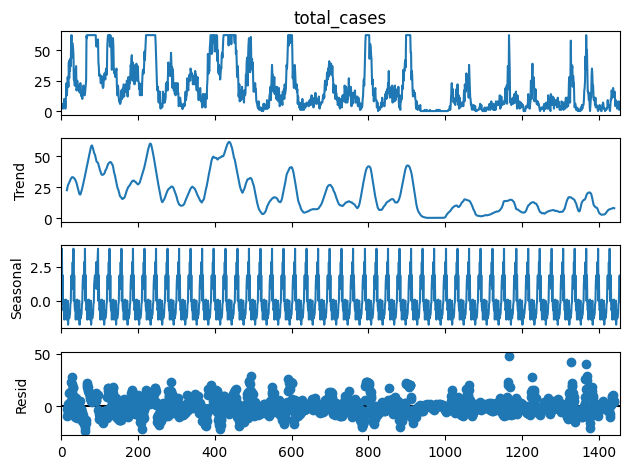

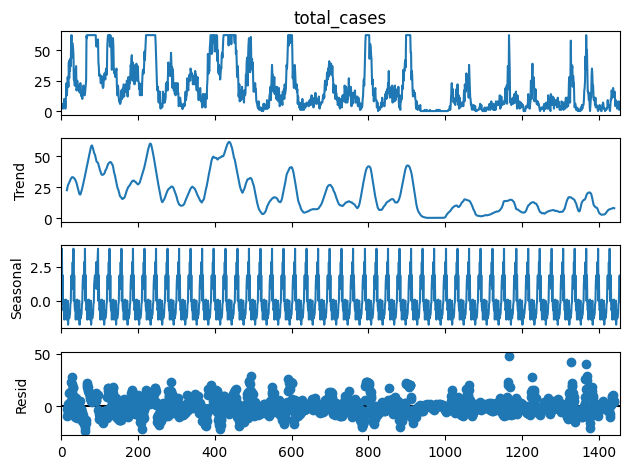

In [ ]:
# decompose the data to see the trend, seasonality and noise
decompose = seasonal_decompose(df["total_cases"], model="additive", period=30)
decompose.plot()

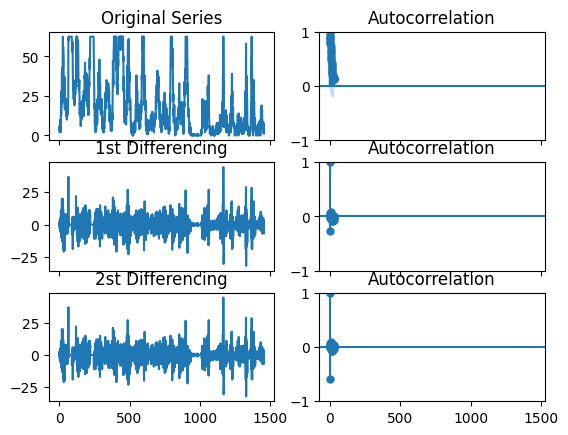

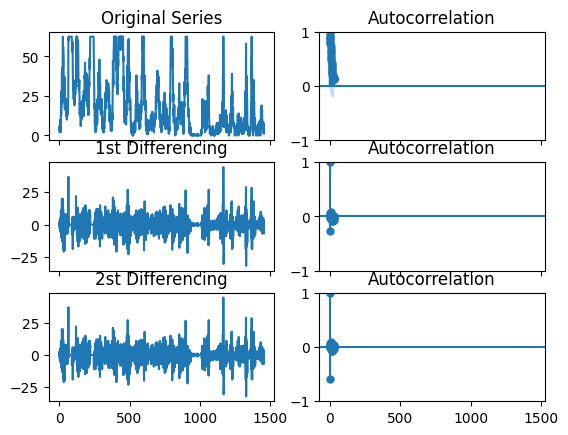

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Original Series
fig, axes = plt.subplots(3,2, sharex=True)
axes[0,0].plot(df["total_cases"]);axes[0,0].set_title("Original Series")
plot_acf(df["total_cases"],ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(df["total_cases"].diff());axes[1,0].set_title("1st Differencing")
plot_acf(df["total_cases"].diff().dropna(),ax=axes[1,1])

# 2st Differencing
axes[2,0].plot(df["total_cases"].diff());axes[2,0].set_title("2st Differencing")
plot_acf(df["total_cases"].diff().diff().dropna(),ax=axes[2,1])


## Lets Find 'p' value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

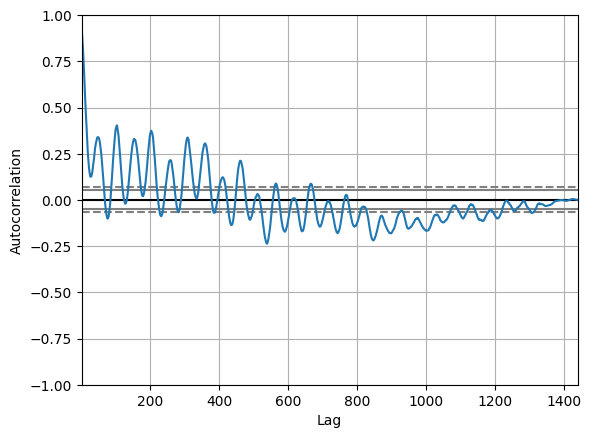

In [ ]:
pd.plotting.autocorrelation_plot(df["total_cases"])

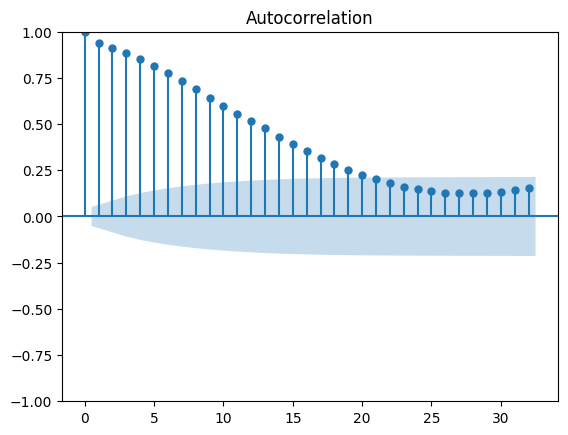

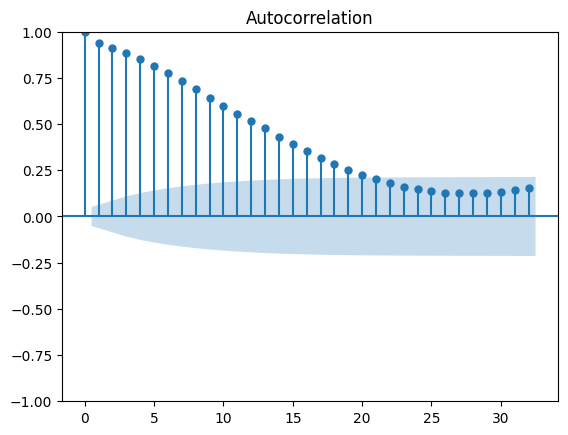

In [ ]:
plot_acf(df["total_cases"], alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df["total_cases"]))
print(x_acf)

           0
0   1.000000
1   0.938756
2   0.909622
3   0.883424
4   0.850011
5   0.812929
6   0.775743
7   0.734424
8   0.688771
9   0.642944
10  0.599195
11  0.554626
12  0.514516
13  0.476668
14  0.430190
15  0.391479
16  0.353870
17  0.316990
18  0.284774
19  0.251207
20  0.226615
21  0.201109
22  0.180275
23  0.161929
24  0.147932
25  0.136652
26  0.126079
27  0.125983
28  0.125982
29  0.126647
30  0.134723
31  0.142666


## Lets find 'q' Value

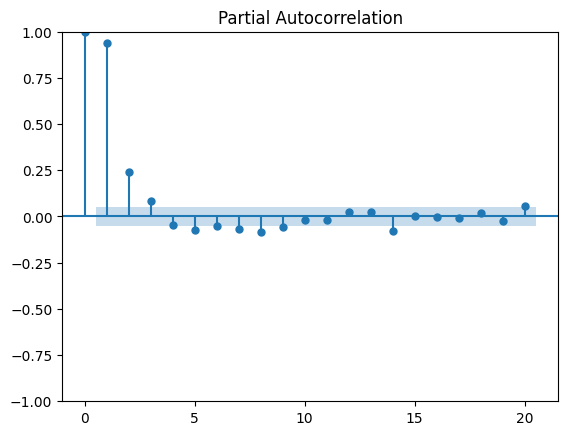

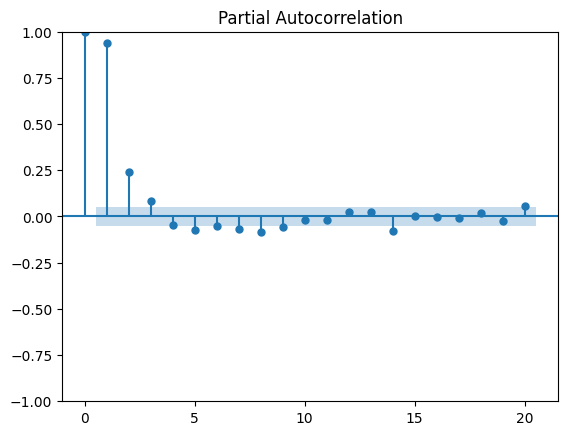

In [ ]:
plot_pacf(df["total_cases"], lags=20, alpha=0.05)

In [ ]:
# Lets define p,q,d value

p = 0
d = 1 
q = 3

In [ ]:
from pmdarima.arima import auto_arima

model_auto_arima = auto_arima(df["total_cases"], start_p=0, start_q=0, max_p=0, max_q=3, m=12, start_P=0,
                              seasonal=True, d=1, D=1, trace=True, error_action="ignore", suppress_warnings=True )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10457.156, Time=0.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=10046.211, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.54 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9882.136, Time=2.48 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.70 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=9788.789, Time=3.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=9958.989, Time=1.77 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=13.84 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=4.92 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=9789.318, Time=2.43 sec
 ARIMA(0,1,1)(2,1,0)[12] intercept   : AIC=9790.778, Time=6.10 sec

Best model:  ARIMA(0,1,1)(2,1,0)[12]          
Total fit time: 53.542 seconds


In [ ]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1439
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood               -4890.394
Date:                             Tue, 20 Feb 2024   AIC                           9788.789
Time:                                     16:16:46   BIC                           9809.839
Sample:                                          0   HQIC                          9796.651
                                            - 1439                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2563      0.020    -12.847      0.000      -0.295      -0.217
ar.S.L12      -0.6516      0.022    -29.388      0.000      -0.695      -0.608
ar.S.L24      -0.3404      0.022    -15.303      0.000      -0.384      -0.297
sigma2        55.5144      1.406     39.473      0.000      52.758      58.271
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               360.85
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Arima Model

In [ ]:
# Stats model and arima
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 0, 1, 3
model_arima = ARIMA(df["total_cases"], order=(p,d,q))
model_arima = model_arima.fit()
print(model_arima.summary())

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:            total_cases   No. Observations:                 1439
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -4692.800
Date:                Tue, 20 Feb 2024   AIC                           9393.600
Time:                        16:17:29   BIC                           9414.684
Sample:                             0   HQIC                          9401.471
                               - 1439                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2960      0.017    -16.950      0.000      -0.330      -0.262
ma.L2         -0.0087      0.017     -0.509      0.611      -0.042       0.025
ma.L3          0.0804      0.019      4.169      0.0

In [ ]:
forecast = model_arima.predict(len(df['total_cases']), len(df["total_cases"])+30)
#print(forecast)

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



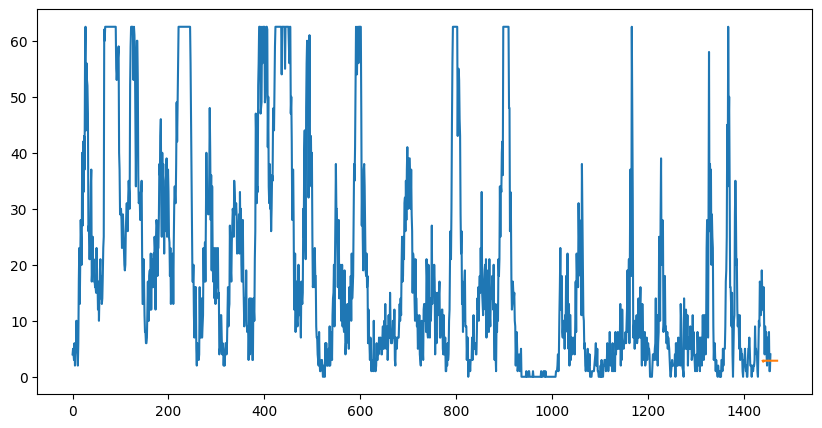

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["total_cases"], label="Actual")
plt.plot(forecast, label="Forecast")

## Sarima Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
p, d, q = 2,1,0

model_sarimax = SARIMAX(df["total_cases"], order=(p,d,q), seasonal_order=(p,d,q,12))

model_sarimax = model_sarimax.fit()

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [ ]:
print(model_sarimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        total_cases   No. Observations:                 1439
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4887.562
Date:                            Tue, 20 Feb 2024   AIC                           9785.124
Time:                                    16:19:30   BIC                           9811.437
Sample:                                         0   HQIC                          9794.951
                                           - 1439                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2704      0.020    -13.690      0.000      -0.309      -0.232
ar.L2         -0.0907      0.020   

In [ ]:
forecast_2 = model_sarimax.predict(start=len(df['total_cases']), end=len(df["total_cases"])+30)

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



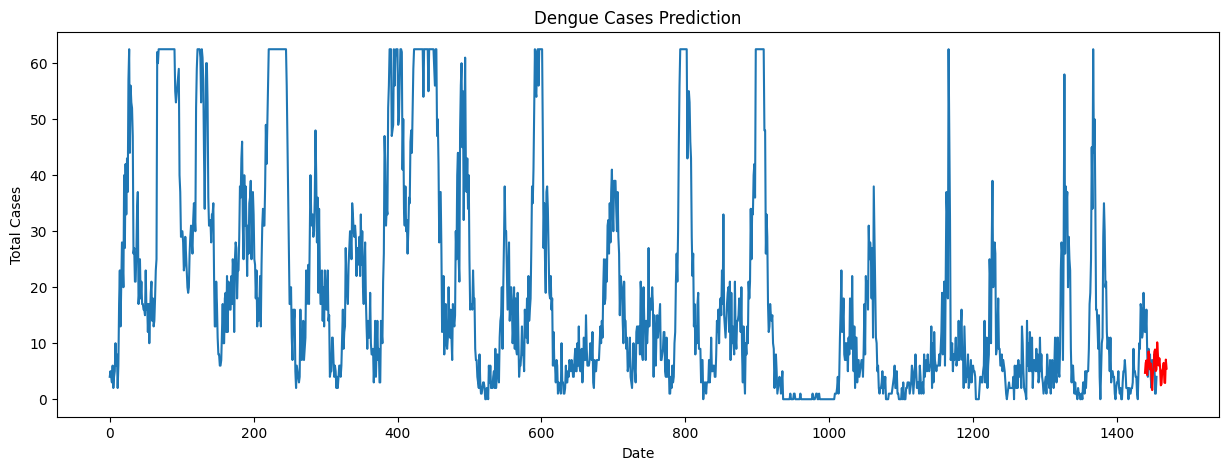

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df["total_cases"], label="Actual")
plt.plot(forecast_2, color="red", label="Forecast")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Dengue Cases Prediction")
plt.show()

In [ ]:
df_train.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [ ]:
train_data = df_train.iloc[:,1:-1]

In [ ]:
label = df_train.iloc[:,-1]

In [ ]:
label

0       4.0
1       5.0
2       4.0
3       3.0
4       6.0
       ... 
1451    5.0
1452    8.0
1453    1.0
1454    1.0
1455    4.0
Name: total_cases, Length: 1439, dtype: float64

In [ ]:
train_data.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
p, d, q = 2,1,2

model_sarimax = SARIMAX(label, order=(p,d,q), seasonal_order=(p,d,q,12), exog=train_data)

model_sarimax = model_sarimax.fit()

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
df["total_cases"].shape

(1439,)

In [ ]:
# Assuming exog_data is your exogenous data
# Assuming forecast_steps is the number of future time periods you want to forecast

# Subset your exogenous data to match the number of forecast steps
exog_data_for_forecast = exog_data.tail(forecast_steps)

# Generate forecasts for future time periods
forecast = sarima_results.get_forecast(steps=forecast_steps, exog=exog_data_for_forecast)


In [ ]:
train_data.shape

(1439, 20)

In [ ]:
exog_data_for_forecast = train_data.tail(100)

In [ ]:
exog_data_for_forecast

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1354,0.232386,0.213957,0.220300,0.198429,62.84,296.078571,297.407143,294.691429,304.6,291.800,27.33,93.055714,62.84,16.142857,8.442857,27.185783,8.059328,32.452437,21.0,44.2
1355,0.327017,0.209117,0.283767,0.309550,52.36,296.545714,297.314286,295.002857,306.8,287.825,47.59,92.777143,52.36,16.582857,8.600000,26.600000,9.775000,32.400000,20.8,18.1
1356,0.354800,0.346550,0.267417,0.392117,44.63,297.044286,298.500000,295.370000,307.5,292.900,39.00,92.048571,44.63,16.872857,9.771429,26.680000,11.240000,33.400000,20.6,36.4
1357,0.200200,0.251386,0.211343,0.199729,32.45,297.310000,298.571429,295.505714,307.4,292.600,110.97,91.092857,32.45,17.057143,9.742857,27.400000,12.100000,34.200000,18.5,18.1
1358,0.430371,0.433014,0.385655,0.399650,26.03,297.214286,298.500000,295.347143,305.6,292.700,39.69,90.727143,26.03,16.847143,9.342857,27.900000,11.225000,34.800000,19.8,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.500,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.400000,22.4,27.0
1452,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.900,110.97,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.700000,21.7,36.6
1453,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.400,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.200000,19.2,7.4
1454,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.900,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.200000,21.0,16.0


In [ ]:
forecast_3 = model_sarimax.forecast(steps=30, exog=exog_data_for_forecast)

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\Test User\.conda\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
forecast_3

1439     4.706781
1440     6.483145
1441     6.934958
1442     4.323449
1443     5.990710
1444     8.522193
1445     6.940370
1446     5.324090
1447     6.370934
1448     4.132007
1449     1.632245
1450     4.568008
1451     6.012246
1452     8.451364
1453     8.882291
1454     5.023824
1455     5.332307
1456    10.156874
1457     7.924995
1458     6.024047
1459     7.313668
1460     5.747451
1461     2.474527
1462     2.708477
1463     5.144958
1464     5.514502
1465     6.489985
1466     2.967184
1467     2.902623
1468     7.080822
Name: predicted_mean, dtype: float64

In [ ]:
abs(forecast_3)

1439    2.004137
1440    0.371916
1441    0.061454
1442    2.832636
1443    3.091509
          ...   
1799    2.579330
1800    0.582773
1801    0.698732
1802    1.743906
1803    1.753896
Name: predicted_mean, Length: 365, dtype: float64

In [ ]:
df["total_cases"]

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1439, dtype: int64

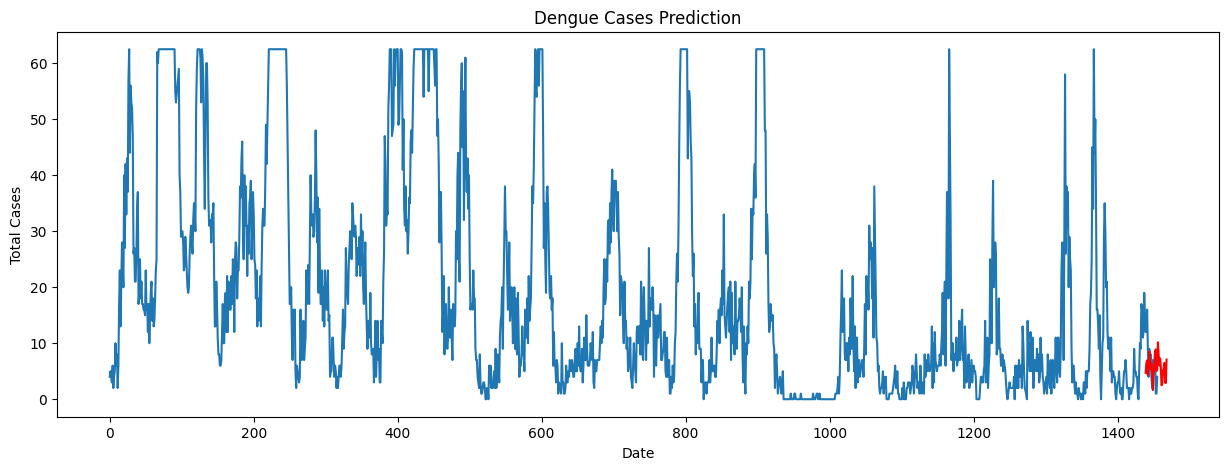

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(label, label="Actual")
plt.plot(forecast_3, color="red", label="Forecast")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Dengue Cases Prediction")
plt.show()

In [ ]:
forecast_3.shape

(365,)